c:\Users\User\anaconda3\envs\GPU\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\User\anaconda3\envs\GPU\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


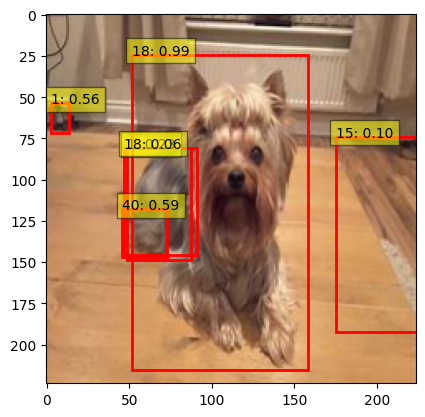

In [2]:
import torch
import torchvision.transforms as T
from PIL import Image
from torchvision.models.detection import fasterrcnn_resnet50_fpn
import matplotlib.pyplot as plt
import matplotlib.patches as patches

COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
    'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
    'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange',
    'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
    'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
    'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator',
    'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

def detect_objects(image_path):
    image = Image.open(image_path)
    transform = T.Compose([T.Resize((224, 224)), T.ToTensor()])
    image = transform(image).unsqueeze(0)
    
    # Load a pre-trained Faster R-CNN model
    model = fasterrcnn_resnet50_fpn(pretrained=True)
    model.eval()

    # Perform inference
    with torch.no_grad():
        prediction = model(image)
    # Draw bounding boxes and labels on the image
    image_np = image.squeeze(0).permute(1, 2, 0).numpy()

    # Draw bounding boxes and labels on the image
    fig, ax = plt.subplots(1)
    ax.imshow(image_np)
    for element in range(len(prediction[0]['boxes'])):
        box = prediction[0]['boxes'][element].cpu().numpy()
        label = prediction[0]['labels'][element].cpu().numpy()
        score = prediction[0]['scores'][element].cpu().numpy()

        # Draw rectangle and label for each detection
        rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        plt.text(box[0], box[1], f'{label}: {score:.2f}', bbox=dict(facecolor='yellow', alpha=0.5))

    plt.show()
# Example usage
image_url = 'D:/Casper/Data/Animals-10/raw-img/cane/OIP-_B6CgFEjzBAfx-reN05sxQHaFj.jpeg'  # Replace with your image URL
detect_objects(image_url)
